In [104]:
# Changes made by Adina

In [105]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [106]:
# describe the model
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - k * E
    dIdt = delta * E -(1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [107]:
# describe the parameters
N =  10000000                           # population
D = 4.0                                 # number of days the infection lasts
gamma = 1.0/D                           # the proportion of infected recovering per day = mean recovery rate
delta = 1.0/5.0                         # incubation period of five days
R_0 = 10.0                              # R_0 = beta / gamma = "reproduktionstalet" dvs hur många nya smittade av varje smittad person
beta = R_0 * gamma                      # beta = R_0 * gamma
#beta = 2.5                             # number of infections spread per infected person and per time
k=1/7                                   # Exposed to Infected
alpha = 0.1                             # 10% death rate
rho = 1/9                               # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0    # initial conditions: one infected, rest susceptible

In [108]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

In [109]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

plot the graph

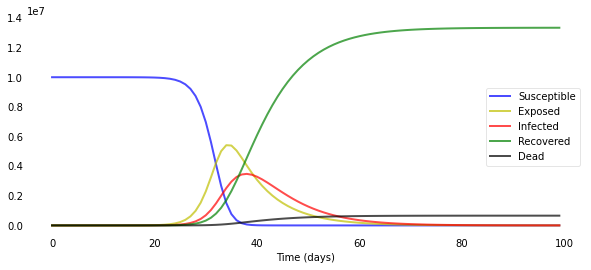

In [110]:

plotsir(t, S, E, I, R, D)